In [1]:
pip install torchvision

In [2]:
# importing required packages

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# setting up the training and test data using data loaders

train_set = torchvision.datasets.FashionMNIST(root=".", train=True,
                                              download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root=".", train=False,
                                             download=True, transform=transforms.ToTensor())
training_loader = torch.utils.data.DataLoader(train_set, batch_size=32,
                                              shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32,
                                          shuffle=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [4]:
# initialising the CNN



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # convolution layer with 1 input channel, 32 output channels, and a 5x5 convolution kernel
        self.conv1 = nn.Conv2d(1, 32, 5)
        # initialising weights using xavier initialisation
        nn.init.xavier_normal_(self.conv1.weight)
        # convolution layer with 32 input channels, 64 output channels, and a 5x5 convolution kernel
        self.conv2 = nn.Conv2d(32, 64, 5)
        # initialising weights using xavier initialisation
        nn.init.xavier_normal_(self.conv2.weight)
        # fully connected layer with 256 activations as output
        self.fc1 = nn.Linear(64 * 4 * 4, 256)
        # initialising weights using xavier initialisation
        nn.init.xavier_normal_(self.fc1.weight)
        # fully connected layer with 10 activations as output, i.e., one for each clothing class
        self.fc2 = nn.Linear(256, 10)
        # initialising weights using xavier initialisation
        nn.init.xavier_normal_(self.fc2.weight)

    def forward(self, x):
        # applying max pooling to convolution layers with relu activation
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))

        # using tanh activation (comment out above lines and include below code to test tanh activation)

        #x = F.max_pool2d(torch.tanh(self.conv1(x)), (2))
        #x = F.max_pool2d(torch.tanh(self.conv2(x)), (2))

        # using sigmoid activation (comment out above lines and include below code to test sigmoid activation)

        #x = F.max_pool2d(torch.sigmoid(self.conv1(x)), (2))
        #x = F.max_pool2d(torch.sigmoid(self.conv2(x)), (2))

        # using ELU activation (comment out above lines and include below code to test ELU activation)

        #x = F.max_pool2d(F.elu(self.conv1(x)), (2))
        #x = F.max_pool2d(F.elu(self.conv2(x)), (2))


        # flatten the tensors so that the outputs of the previous layer can be used as inputs for the fully connected layer
        x = torch.flatten(x, 1) # flatten all dimensions except batch

        # using relu activation after fully connected layer
        x = F.relu(self.fc1(x))


        # using tanh activation after fully connected layer
        #x = torch.tanh(self.fc1(x))

        # using sigmoid activation after fully connected layer
        #x = torch.sigmoid(self.fc1(x))

        # using ELU activation after fully connected layer
        #x = F.elu(self.fc1(x))

        # adding a dropout layer with dropout rate of 0.3 (uncomment to test)
        #x = F.dropout(x, p = 0.3)

        # fully connected layer
        x = self.fc2(x)
       


        return x



In [5]:
net = Net()
#setting the loss function to cross-entropy
loss_fn = nn.CrossEntropyLoss()
learning_rate = 10
# using stochastic gradient descent as the optimisation method
opt = optim.SGD(net.parameters(), lr=learning_rate)

In [6]:
# implementation of the training loop adapted from the lab solutions

# functions which computes the accuracy scores for each epoch
def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs, labels
    # performs a forward pass
    outputs = net(inputs)
    # assigns predictions based on which entry of the output has the highest softmax probability
    _, pred = torch.max(outputs.data, 1)
    # total number of images being classified
    total += labels.size(0)
    # number of correct predictions, i.e., cases where the predicted class is the same as the true class
    correct += (pred == labels).sum().item()
  return 100 * correct / total # returns the accuracy

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
test_accuracy = []

# training loop
for epoch in range(max_epochs): # iterates over each epoch 
  loss_epoch = 0 # initialise epoch loss
  for i, data in enumerate(training_loader, 0): # iterates over all the training data
    net.train()
    inputs, labels = data
    inputs, labels = inputs, labels
    opt.zero_grad()
    outputs = net(inputs) # performs a forward pass
    loss = loss_fn(outputs, labels) # computes the loss, given the outputs obtained from the forward pass
    loss.backward() # backpropagation step
    opt.step() # updating parameters of the model
    loss_epoch += loss.item() # computes the total epoch loss
  loss_epoch_array.append(loss_epoch) # stores the epoch loss in the epoch loss list
  train_accuracy.append(evaluation(training_loader)) # computes the training accuracy
  test_accuracy.append(evaluation(test_loader)) # computes the test accuracy
  print("Epoch: {}, loss: {:.4f}, train accuracy: {:.2f}, test accuracy:{:.2f}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1])) # displays the accuracy scores and loss for each epoch

Epoch: 1, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 2, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 3, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 4, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 5, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 6, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 7, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 8, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 9, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 10, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 11, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 12, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 13, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 14, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 15, loss: nan, train accuracy: 10.00, test accuracy:10.00
Epoch: 16, loss: nan, train accura

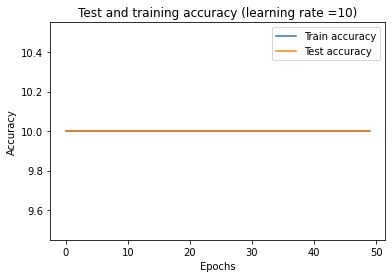

In [7]:
# plotting training and test accuracy after each epoch

plt.plot(train_accuracy, label="Train accuracy")
plt.plot(test_accuracy, label="Test accuracy")
plt.title('Test and training accuracy (learning rate ={})'.format(learning_rate))
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

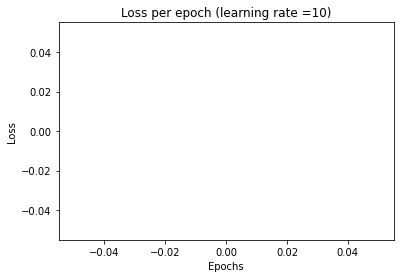

In [8]:
# plotting training loss after each epoch
plt.plot(loss_epoch_array, label= "Loss")
plt.title('Loss per epoch (learning rate ={})'.format(learning_rate))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()